In [1]:
import numpy as np
import control
from control.matlab import *
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [2]:
perturbation = 0.0
data = {}

data['num_1'] = np.float32(1) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
# data['num_2'] = np.float32(0) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_1'] = np.float32(1) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_2'] = np.float32(3) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
data['den_3'] = np.float32(2) * (1.0 + perturbation * np.random.uniform(-1.0, 1.0))
 
num = [data['num_1']]
den = [data['den_1'], data['den_2'], data['den_3']]

# num = [1]
# den = [1, 3, 2]
ts = 1e-2; fs = 1/ts
s = tf('s')
z = tf([1, 0], [1], dt=ts)
G_continuous = tf(num,den)
G = c2d(G_continuous, ts, 'matched')
# G_proper = z**2*G
# tau = stepinfo(G)['SettlingTime']/5
# G_proper = G * (1 + 5e-1 * (tau / (2 * np.pi)) * s) **2

In [3]:
z

TransferFunction(array([1, 0]), array([1]), 0.01)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

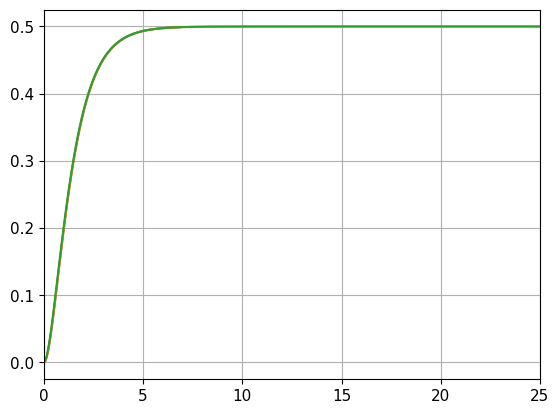

In [4]:
plt.plot(step(G_continuous)[1], step(G_continuous)[0])
plt.plot(step(G)[1], step(G)[0])
# plt.plot(step(G_proper)[1], step(G_proper)[0])
# plt.plot(step(G_proper)[1], step(G_proper)[0])

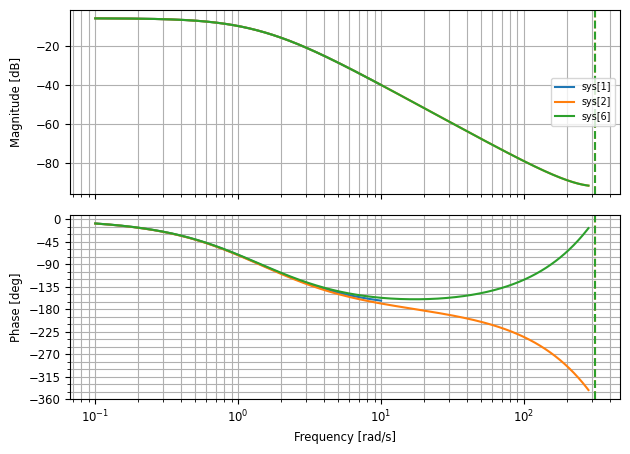

In [5]:
bode(G_continuous)
bode(G)
# bode(G_proper)
plt.show()

In [6]:
from utils import prbs, random_signal
T = 20
t = np.arange(0, T, ts)
r = 100 * np.ones(t.shape)
u = np.random.normal(0, 1000, t.shape)

# tau = 1  # s
# M = 1 / (1 + (tau / (2 * np.pi)) * s)
# M = c2d(M, ts, 'matched')
# 
# y_d = lsim(M, r, t)[0]
# 
# # print(G)
# u = lsim(G_proper**-1, y_d, t)[0]

# u = lsim(G_proper**(-1), u, t)[0]

y, _, x = lsim(G, u, t, return_x=True)

/home/rbusetto/.virtualenvs/sysid-transformers-control/lib/python3.10/site-packages/control/timeresp.py:1003: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

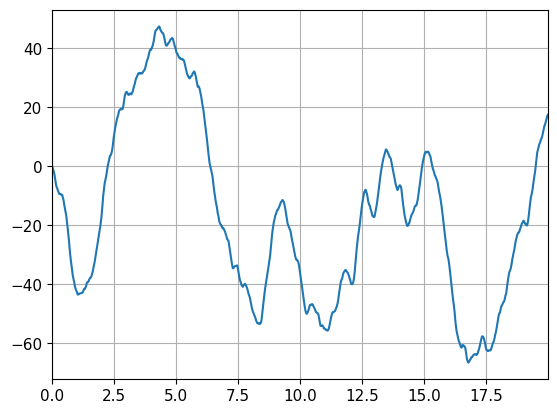

In [8]:
# plt.plot(t, r)
# plt.plot(t, y_d)
plt.plot(t, y)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

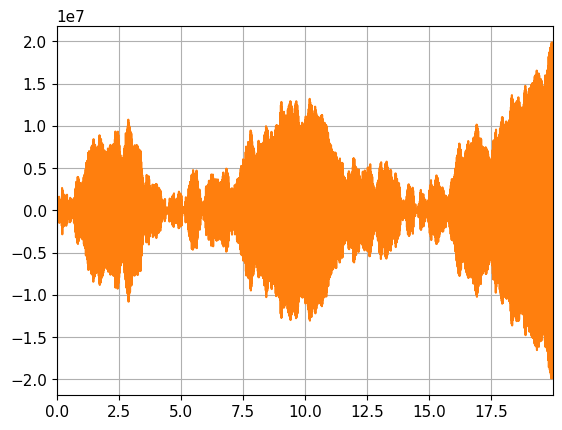

In [15]:
integrator = (ts / 2) * (z + 1) / (z - 1)
v = lsim(integrator**-1, u, t)[0]
plt.plot(t, u)
plt.plot(t, v)

In [26]:
from u_estimate import u_estimate
U = u_estimate(u, ts)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

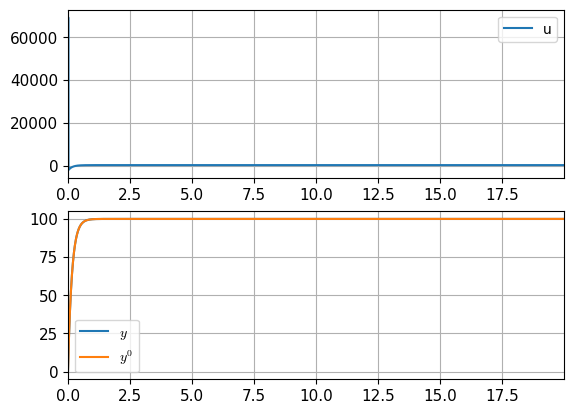

In [27]:
y_0, t, _ = lsim(G_proper, u, t)
y = y_0# + np.random.normal(0, 3, t.shape)
plt.subplot(211)
plt.plot(t, u, label="u")
# plt.xlim([10, 20])
# plt.ylim([-5000,5000])
plt.legend()

plt.subplot(212)
# plt.plot(t, y_ideal, label="y")
plt.plot(t, y, label="$y$")
plt.plot(t, y_0, label=r"$y^{\mathrm{0}}$")
# plt.xlim([10, 20])
# plt.ylim([-12,12])
plt.legend()

In [28]:
U

TransferFunction(array([1., 0.]), array([ 1.00000000e+00, -9.39101367e-01, -1.53485692e-16,  7.42700189e-15]), 0.01)

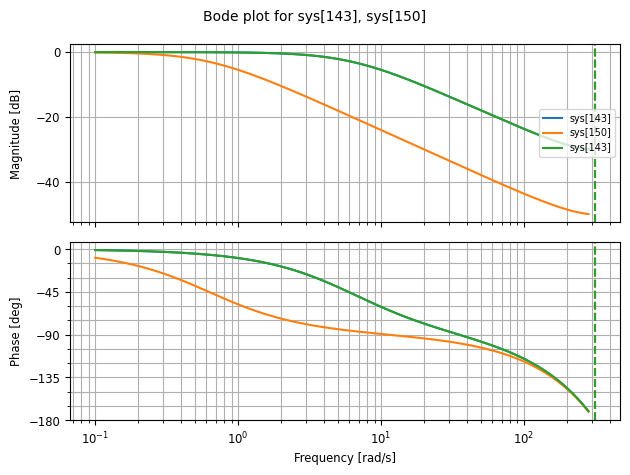

In [29]:
# VRFT
s = tf('s')
tau = 1 # s
M = 1/(1 + (tau/(2*np.pi))*s)
M = c2d(M, ts, 'matched')
# M = M*(1 + 1e-2*(tau/(2*np.pi))*s) # add a high freq zero for inversion
W = 1/(1 + (10*tau/(2*np.pi))*s)
W = c2d(W, ts, 'matched')


L = M# minreal( minreal((1 - M)*M)*minreal(W*U**-1) )

# T_cl = tau + 10#0.5
# t_cl = np.arange(0, T_cl, ts)
# y_d, _ = step(M, t_cl)

bode(M, W, L)
plt.show()
# plt.subplot(212)
# plt.plot(t_cl, y_d)
# plt.plot(t_cl, y_d)

In [30]:
L

TransferFunction(array([0.06089863]), array([ 1.        , -0.93910137]), 0.01)

In [31]:
# vrft
u_L = lsim(L, u, t)[0]
y_L = lsim(L, y, t)[0]
M_proper = z*M
r_v = lsim(M_proper**(-1), y_L, t)[0]
e_v = r_v - y_L

In [32]:
B=[tf([1],[1],ts),
   tf(ts*np.array([1, 1]),2*np.array([1, -1]),ts),
   tf(np.array([2, -2]),ts*np.array([3, -1]),ts)]

In [33]:
import cvxpy as cp
theta = cp.Variable(3)
u_theta = theta[0]*lsim(B[0], e_v, t)[0] + theta[1]*lsim(B[1], e_v, t)[0] + theta[2]*lsim(B[2], e_v, t)[0]

In [34]:
cost = cp.sum_squares(u_L - u_theta)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()
theta_sol = theta.value

In [35]:
C = theta_sol[0]*B[0] + theta_sol[1]*B[1] + theta_sol[2]*B[2]
F = C*G_proper/(1 + C*G_proper)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

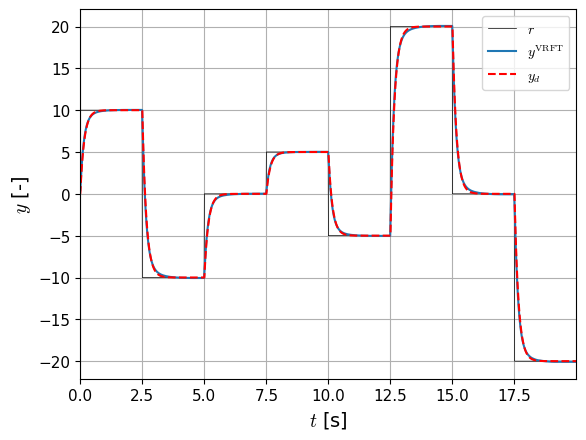

In [36]:

# y_cl, _ = step(F, t_cl)
# plt.plot(t_cl, y_cl, label='y')
# plt.plot(t_cl, y_d, label='y_d')
# plt.legend()
# plt.show()
T_CL = 20#seq_len*ts
t_CL = np.arange(0, T_CL, ts)
r = np.zeros(len(t_CL))

r = np.zeros(t_CL.shape)
r[t_CL < 10] = 10
r[(t_CL >= 2.5) & (t_CL < 5)] = -10
r[(t_CL >= 5.0) & (t_CL < 7.5)] = 0
r[(t_CL >= 7.5) & (t_CL < 10)] = 5
r[(t_CL >= 10.) & (t_CL < 12.5)] = -5
r[(t_CL >= 12.5) & (t_CL < 15.)] = 20
r[(t_CL >= 15.0) & (t_CL < 17.5)] = 0
r[(t_CL >= 17.5) & (t_CL < 20.0)] = -20

y_d = lsim(M, r, t_CL, return_x=False)[0]
y_cl = lsim(F, r, t_CL, return_x=False)[0]

plt.plot(t_CL, r, color='k', linewidth=0.5, label='$r$')
plt.plot(t_CL, y_cl, label=r'$y^{\mathrm{VRFT}}$')
plt.plot(t_CL, y_d, color='r', linestyle='--', label='$y_d$')
plt.xlabel("$t$ [s]")
plt.ylabel("$y$ [-]")
plt.legend()
plt.margins(x=0)
plt.show()